#  Perceptron Classifier on the Penguins Dataset
In this notebook, we implement and evaluate the **Perceptron algorithm**, one of the foundational methods in machine learning for binary classification tasks.

We apply it to a subset of the **Palmer Penguins dataset**, using it to distinguish between **Adelie** and **Gentoo** penguin species based on physical characteristics.

##  What is a Perceptron?
A **Perceptron** is the simplest type of artificial neural network. It models a single neuron that:
- Takes several binary or continuous inputs
- Applies a set of weights and bias
- Outputs a decision (-1 or 1) based on a linear combination followed by a step function

The Perceptron can solve **linearly separable** classification problems.

In [103]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [106]:
# Perceptron class
class Perceptron(object):
    def __init__(self, eta=0.5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

##  Understanding Our Dataset
We will classify penguins as **Adelie** (label -1) or **Gentoo** (label 1), using the following features:
- Bill Length
- Bill Depth
- Flipper Length
- Body Mass

We'll train a Perceptron using the standard algorithm. Finally, we will evaluate and visualize performance.

In [105]:
# Load and process dataset with updated features and labels
penguins = pd.read_csv("penguins.csv")
penguins = penguins.dropna()
penguins = penguins[penguins['species'].isin(['Adelie', 'Gentoo'])]

# Select 4 features
X = penguins[['bill_length_mm', 'flipper_length_mm', 'bill_depth_mm','body_mass_g']].values
y = penguins['species'].values

# Encode: Adelie = -1, Gentoo = 1
y=np.where(y=="Adelie",-1,1)

#Split data into test and trainung data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Train and predict
perceptron = Perceptron(epochs=1000)
perceptron.train(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 81.13%


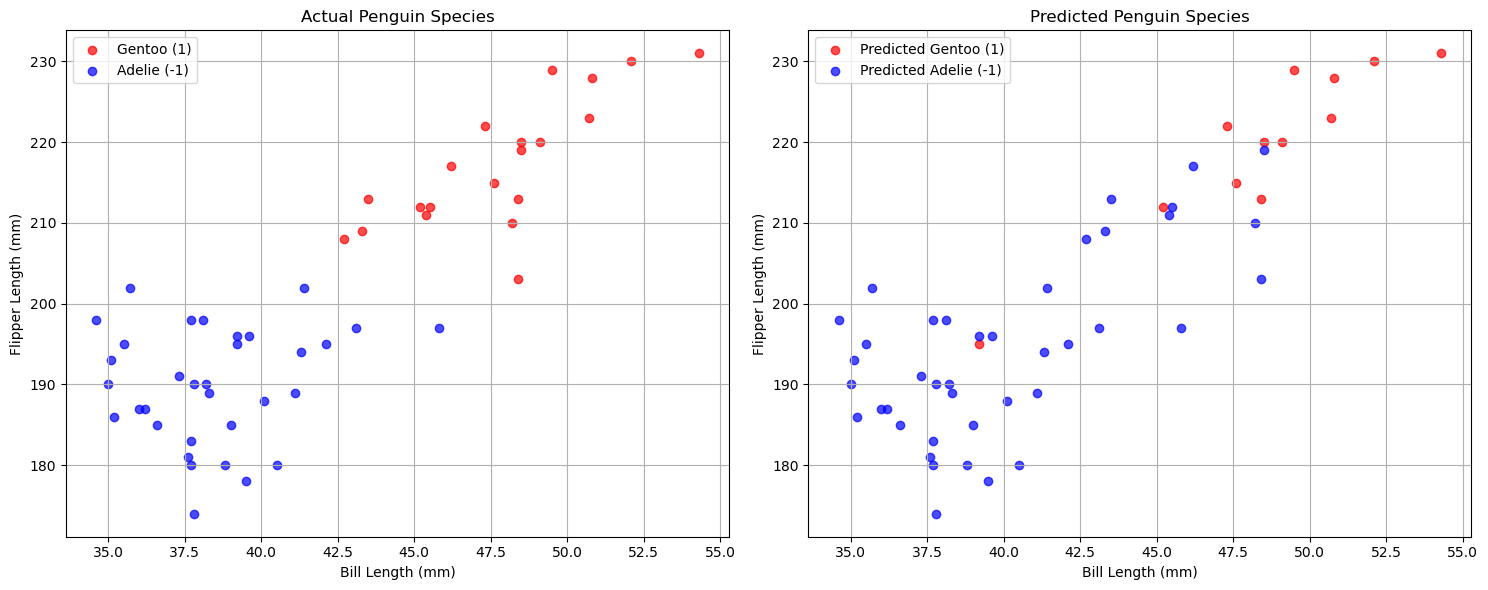

In [100]:
# Create side-by-side subplots
plt.figure(figsize=(15, 6))

# --- Actual Labels Plot ---
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color='red', alpha=0.7, label='Gentoo (1)')
plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1],
            color='blue', alpha=0.7, label='Adelie (-1)')
plt.title('Actual Penguin Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend()
plt.grid(True)

# --- Predicted Labels Plot ---
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1],
            color='red', alpha=0.7, label='Predicted Gentoo (1)')
plt.scatter(X_test[y_pred == -1, 0], X_test[y_pred == -1, 1],
            color='blue', alpha=0.7, label='Predicted Adelie (-1)')
plt.title('Predicted Penguin Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

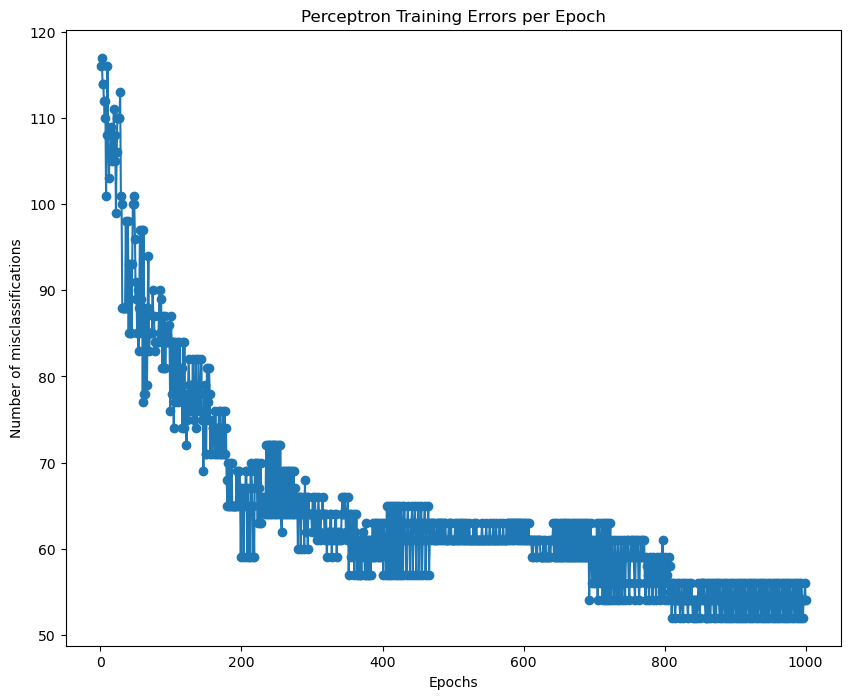

In [94]:
# Plot training errors
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.title('Perceptron Training Errors per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

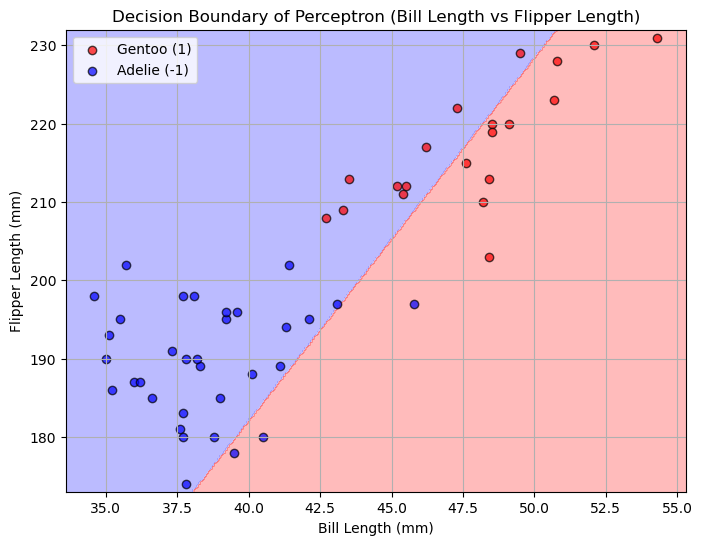

In [99]:
# Use only the first two features for 2D plotting
X_train_2D = X_train[:, [0, 1]]
X_test_2D = X_test[:, [0, 1]]

# Retrain the Perceptron on just the 2D features
perceptron_2D = Perceptron(epochs=1000)
perceptron_2D.train(X_train_2D, y_train)

# Set up meshgrid for plotting decision regions
x_min, x_max = X_test_2D[:, 0].min() - 1, X_test_2D[:, 0].max() + 1
y_min, y_max = X_test_2D[:, 1].min() - 1, X_test_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron_2D.predict(grid_points).reshape(xx.shape)

# Plot decision boundary with test points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_test_2D[y_test == 1, 0], X_test_2D[y_test == 1, 1], 
            color='red', label='Gentoo (1)', edgecolor='k', alpha=0.7)
plt.scatter(X_test_2D[y_test == -1, 0], X_test_2D[y_test == -1, 1], 
            color='blue', label='Adelie (-1)', edgecolor='k', alpha=0.7)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Decision Boundary of Perceptron (Bill Length vs Flipper Length)')
plt.legend()
plt.grid(True)
plt.show()